In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

In [2]:
file_path = './part2_cls/'
class_name = ['identity_hate', 'insult', 'threat', 'obscene', 'severe_toxic', 'toxic']
cls = dict()
for name in class_name:
    file_name = file_path + name + '.sav'
    cls[name] = pickle.load(open(file_name, 'rb'))
vectorizer = pickle.load(open('./part2_cls/vector_p2.sav', 'rb'))
feature_to_index_part2 = dict()
feature_name_part2 = vectorizer.get_feature_names()
for i, j in enumerate(feature_name_part2):
    feature_to_index_part2[j] = i
    

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.21.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.21.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
example_sentence = ["Fuck you, block me, you faggot pussy!"]

example_vec = vectorizer.transform([example_sentence[0]])
example_sentence = vectorizer.inverse_transform(example_vec)[0]

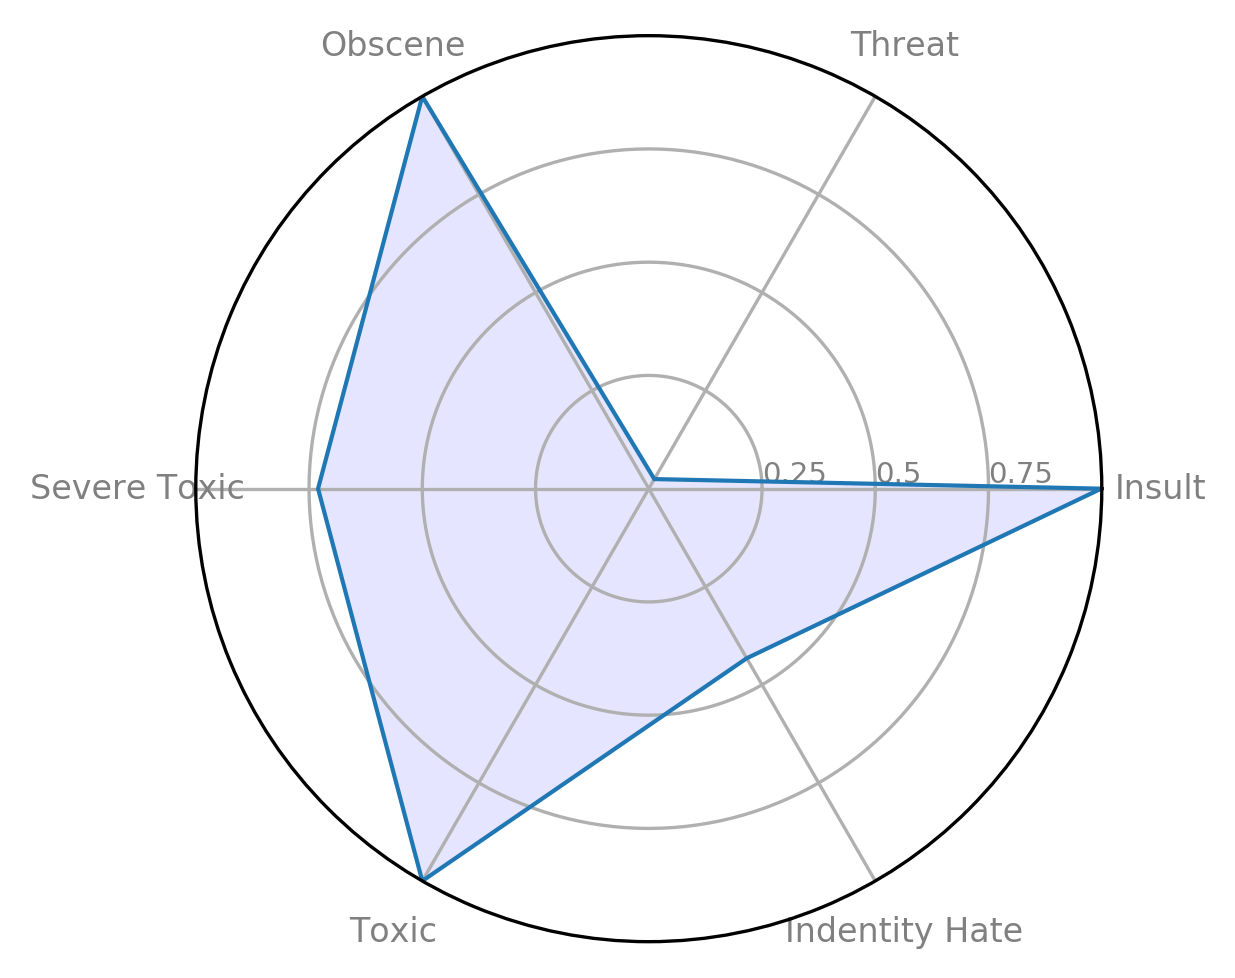

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Radar Chart'],
'Insult': [cls['insult'].predict_proba(example_vec)[0][1]],
'Threat': [cls['threat'].predict_proba(example_vec)[0][1]],
'Obscene': [cls['obscene'].predict_proba(example_vec)[0][1]],
'Severe Toxic': [cls['severe_toxic'].predict_proba(example_vec)[0][1]],
'Toxic': [cls['toxic'].predict_proba(example_vec)[0][1]],
'Indentity Hate': [cls['identity_hate'].predict_proba(example_vec)[0][1]]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=7)
plt.ylim(0,1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


"\nplt.clf()\nplt.bar(y_pos, performance, align='center', alpha=0.5)\nplt.xticks(y_pos, objects)\nplt.ylabel('Weight')\nplt.title('Weight of words')\n\nplt.show()\n"

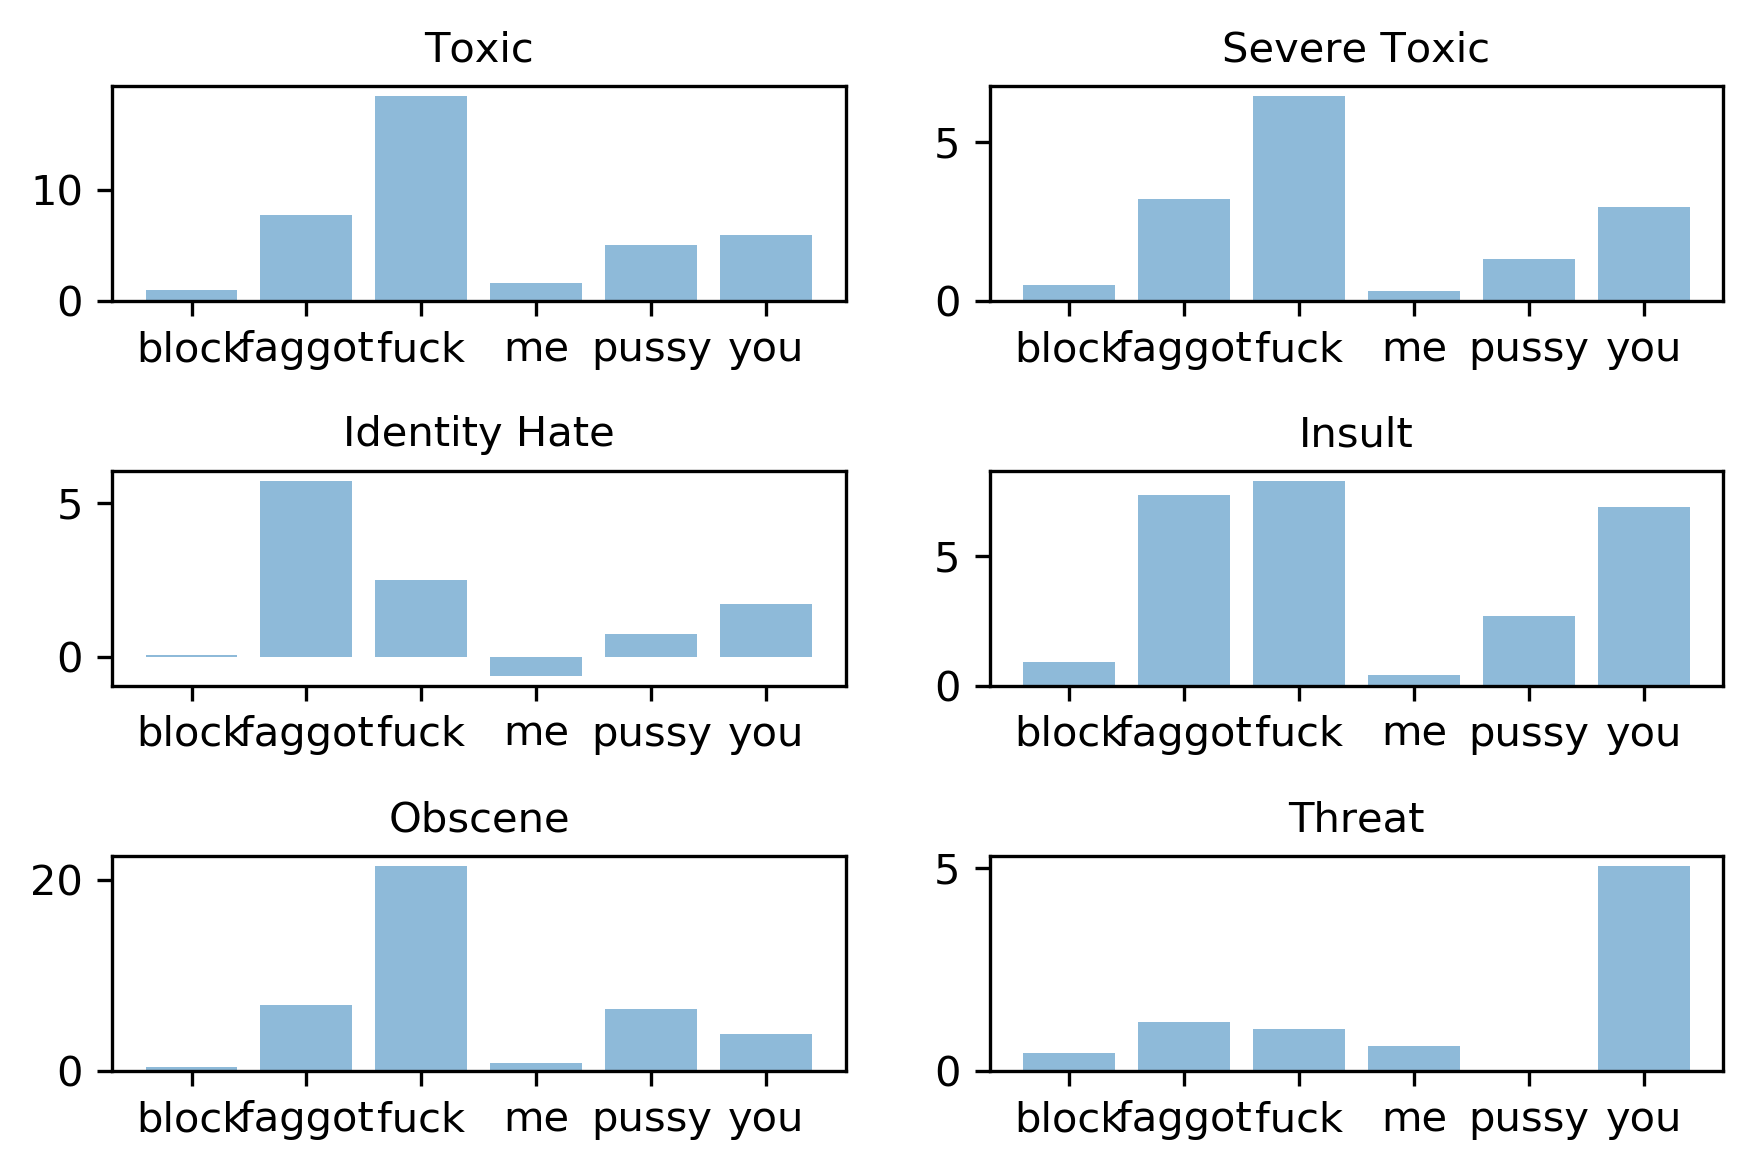

In [8]:
weights = dict()

for name in class_name:
    weights[name] = []
    coef = cls[name].coef_[0]
    for word in example_sentence:
        if feature_to_index_part2.get(word, -1) != -1:
            weights[name].append(coef[feature_to_index_part2.get(word, -1)])
        else:
            weights[name].append(0.0)
#print(weights)

import matplotlib.pyplot as plt; 
#plt.rcdefaults()
import numpy as np


objects = example_sentence

y_pos = np.arange(len(objects))
performance = weights
fig, axs = plt.subplots(3, 2, sharex=False, sharey=False)
axs[0,0].bar(objects, performance['toxic'], align='center', alpha=0.5)
axs[0,0].set_title("Toxic", fontsize = 10)
axs[0,1].bar(objects, performance['severe_toxic'], align='center', alpha=0.5)
axs[0,1].set_title("Severe Toxic", fontsize = 10)
axs[1,0].bar(objects, performance['identity_hate'], align='center', alpha=0.5)
axs[1,0].set_title("Identity Hate", fontsize = 10)
axs[1,1].bar(objects, performance['insult'], align='center', alpha=0.5)
axs[1,1].set_title("Insult", fontsize = 10)
axs[2,0].bar(objects, performance['obscene'], align='center', alpha=0.5)
axs[2,0].set_title("Obscene", fontsize = 10)
axs[2,1].bar(objects, performance['threat'], align='center', alpha=0.5)
axs[2,1].set_title("Threat", fontsize = 10)
fig.tight_layout()


'''
plt.clf()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Weight')
plt.title('Weight of words')

plt.show()
'''